
# Exploratory Data Analysis

This notebook contains a comprehensive exploratory data analysis for the remote sensing captions dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
data_path = '/Users/esrasekerci/Desktop/DI725/project/RISCM/captions.csv'
captions_df = pd.read_csv(data_path)

captions_df.info(), captions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44521 entries, 0 to 44520
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     44521 non-null  object
 1   split      44521 non-null  object
 2   image      44521 non-null  object
 3   caption_1  44521 non-null  object
 4   caption_2  44521 non-null  object
 5   caption_3  44521 non-null  object
 6   caption_4  44521 non-null  object
 7   caption_5  44521 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


(None,
   source split           image  \
 0   NWPU  test  NWPU_31430.jpg   
 1   NWPU  test  NWPU_31431.jpg   
 2   NWPU  test  NWPU_31432.jpg   
 3   NWPU  test  NWPU_31433.jpg   
 4   NWPU  test  NWPU_31434.jpg   
 
                                            caption_1  \
 0   A gray plane on the runway and the lawn beside .   
 1  Three small planes parked in a line on the air...   
 2  A plane parked in a line on the airport with s...   
 3  A small plane and a big plane parked next to b...   
 4       Two planes parked next to boarding bridges .   
 
                                            caption_2  \
 0        A grey plane is on the runway by the lawn .   
 1  There are four aircraft on the open ground, Th...   
 2  A white plane was parked on the instruction li...   
 3  A white plane and a gray plane parked at the b...   
 4  Two aircraft were parked at the departure gates .   
 
                                            caption_3  \
 0  There is an airplane on the runw

In [3]:
# Check caption length distributions
caption_columns = ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']
captions_df['avg_caption_length'] = captions_df[caption_columns].apply(lambda x: sum(len(str(i).split()) for i in x) / len(x), axis=1)

# Caption length statistics
caption_length_stats = captions_df['avg_caption_length'].describe()

# Distribution of data splits (train, validation, test)
split_distribution = captions_df['split'].value_counts()

caption_length_stats, split_distribution

(count    44521.000000
 mean        12.085200
 std          2.232937
 min          5.600000
 25%         10.400000
 50%         12.000000
 75%         13.600000
 max         25.000000
 Name: avg_caption_length, dtype: float64,
 split
 train    35614
 test      4454
 val       4453
 Name: count, dtype: int64)

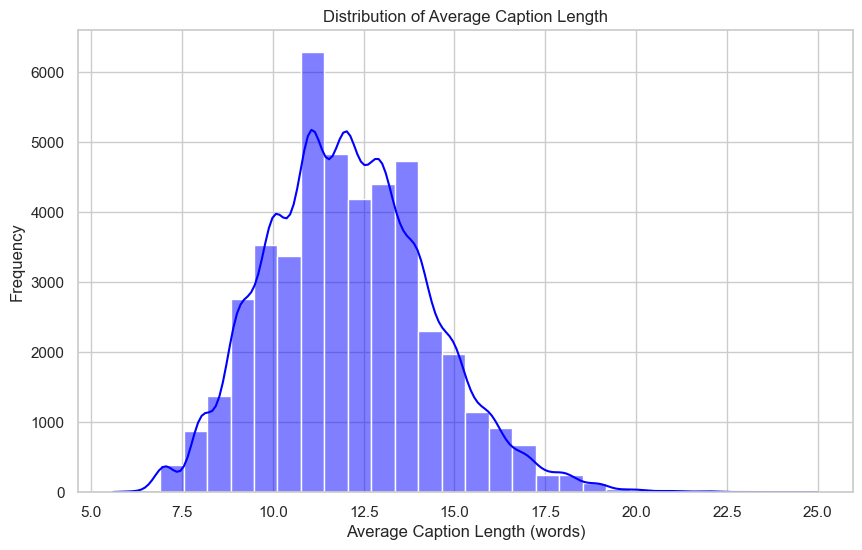

In [4]:
# Histogram of average caption lengths
plt.figure(figsize=(10, 6))
sns.histplot(captions_df['avg_caption_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Caption Length')
plt.xlabel('Average Caption Length (words)')
plt.ylabel('Frequency')
plt.show()

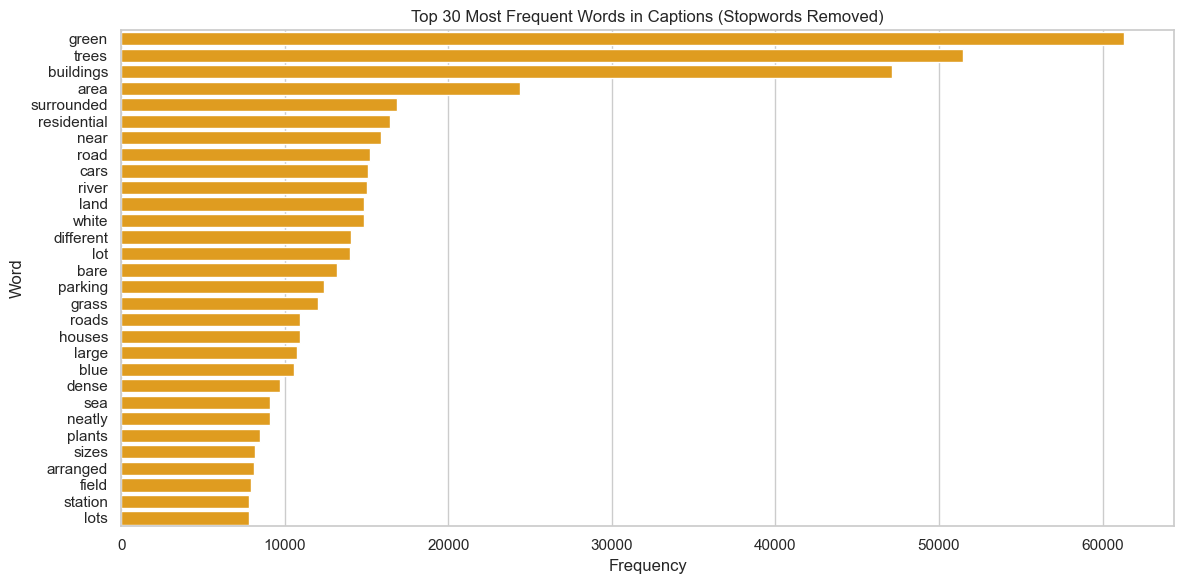

In [ ]:
from collections import Counter
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Combine and preprocess all captions
all_captions = captions_df[['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']].values.flatten()
all_text = ' '.join(map(str, all_captions)).lower()

# Remove punctuation and tokenize
translator = str.maketrans('', '', string.punctuation)
tokens = all_text.translate(translator).split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word.isalpha() and word not in ENGLISH_STOP_WORDS]

# Get most common 30 words
word_freq = Counter(filtered_tokens)
common_words_df = pd.DataFrame(word_freq.most_common(30), columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=common_words_df, color='orange')
plt.title('Top 30 Most Frequent Words in Captions (Stopwords Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()